In [1]:
import tushare as ts
token='f54f66391ef9cf7675004be86d1ea74740d6df4df971cc10b3bbad91'

In [2]:
def get_data(code,start,end):
    df = ts.pro_bar(ts_code=code, adj='qfq', start_date=start, end_date=end)
    return df

In [10]:
data = get_data("000001.SZ", "20200101", "20210112")

In [11]:
data

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20210112,20.3900,21.0000,20.1800,21.0000,20.3800,0.6200,3.0422,1288165.50,2657687.440
1,000001.SZ,20210111,20.0000,20.6400,20.0000,20.3800,19.8500,0.5300,2.6700,1790457.14,3652546.646
2,000001.SZ,20210108,19.9000,20.1000,19.3100,19.8500,19.9000,-0.0500,-0.2513,1195473.22,2348316.363
3,000001.SZ,20210107,19.5200,19.9800,19.2300,19.9000,19.5600,0.3400,1.7382,1584185.30,3111274.625
4,000001.SZ,20210106,18.0800,19.5600,18.0000,19.5600,18.1700,1.3900,7.6500,1934945.12,3648521.909
...,...,...,...,...,...,...,...,...,...,...,...
245,000001.SZ,20200108,16.7123,16.7615,16.3486,16.3781,16.8598,-0.4817,-2.8571,847824.12,1423608.811
246,000001.SZ,20200107,16.8401,16.9876,16.6632,16.8598,16.7812,0.0786,0.4684,728607.56,1247047.135
247,000001.SZ,20200106,16.7222,17.0466,16.6239,16.7812,16.8893,-0.1081,-0.6401,862083.50,1477930.193
248,000001.SZ,20200103,16.6534,17.0171,16.6337,16.8893,16.5845,0.3048,1.8379,1116194.81,1914495.474


In [16]:
data = get_data("000452.O", "20200101", "20210112")

In [17]:
data

In [18]:
# 导入需要的模块
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [19]:
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False

# 抓取网页
def get_url(url, params=None, proxies=None):
    rsp = requests.get(url, params=params, proxies=proxies)
    rsp.raise_for_status()
    return rsp.text

# 从网页抓取数据
def get_fund_data(code,per=10,sdate='',edate='',proxies=None):
    url = 'http://fund.eastmoney.com/f10/F10DataApi.aspx'
    params = {'type': 'lsjz', 'code': code, 'page':1,'per': per, 'sdate': sdate, 'edate': edate}
    html = get_url(url, params, proxies)
    soup = BeautifulSoup(html, 'html.parser')

    # 获取总页数
    pattern=re.compile(r'pages:(.*),')
    result=re.search(pattern,html).group(1)
    pages=int(result)

    # 获取表头
    heads = []
    for head in soup.findAll("th"):
        heads.append(head.contents[0])

    # 数据存取列表
    records = []

    # 从第1页开始抓取所有页面数据
    page=1
    while page<=pages:
        params = {'type': 'lsjz', 'code': code, 'page':page,'per': per, 'sdate': sdate, 'edate': edate}
        html = get_url(url, params, proxies)
        soup = BeautifulSoup(html, 'html.parser')

        # 获取数据
        for row in soup.findAll("tbody")[0].findAll("tr"):
            row_records = []
            for record in row.findAll('td'):
                val = record.contents

                # 处理空值
                if val == []:
                    row_records.append(np.nan)
                else:
                    row_records.append(val[0])

            # 记录数据
            records.append(row_records)

        # 下一页
        page=page+1

    # 数据整理到dataframe
    np_records = np.array(records)
    data= pd.DataFrame()
    for col,col_name in enumerate(heads):
        data[col_name] = np_records[:,col]

    return data


No handles with labels found to put in legend.
No handles with labels found to put in legend.


          净值日期   单位净值   累计净值  日增长率  申购状态  赎回状态 分红送配
0   2020-01-02  2.025  2.240  0.40  开放申购  开放赎回  nan
1   2020-01-03  2.018  2.233 -0.35  开放申购  开放赎回  nan
2   2020-01-06  2.010  2.225 -0.40  开放申购  开放赎回  nan
3   2020-01-07  2.048  2.263  1.89  开放申购  开放赎回  nan
4   2020-01-08  2.039  2.254 -0.44  开放申购  开放赎回  nan
..         ...    ...    ...   ...   ...   ...  ...
244 2021-01-05  3.657  3.872  2.64  开放申购  开放赎回  nan
245 2021-01-06  3.724  3.939  1.83  开放申购  开放赎回  nan
246 2021-01-07  3.805  4.020  2.18  开放申购  开放赎回  nan
247 2021-01-08  3.795  4.010 -0.26  开放申购  开放赎回  nan
248 2021-01-11  3.803  4.018  0.21  开放申购  开放赎回  nan

[249 rows x 7 columns]


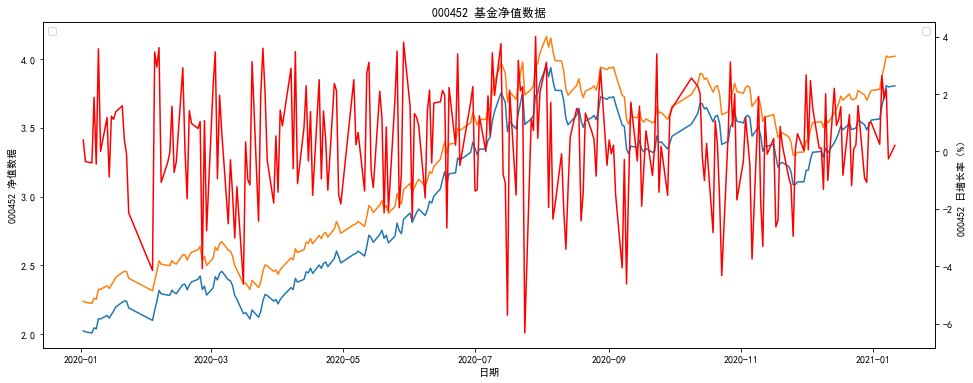

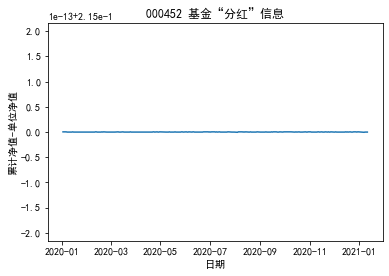

日增长率缺失： 0
日增长率为正的天数： 145
日增长率为负（包含0）的天数： 104


In [25]:
# 主程序
if __name__ == "__main__":
    ticker = '000452'
    data=get_fund_data(ticker,per=49,sdate='2020-01-01',edate='2021-1-12')
    # 修改数据类型
    data['净值日期']=pd.to_datetime(data['净值日期'],format='%Y/%m/%d')
    data['单位净值']= data['单位净值'].astype(float)
    data['累计净值']=data['累计净值'].astype(float)
    data['日增长率']=data['日增长率'].str.strip('%').astype(float)
    # 按照日期升序排序并重建索引
    data=data.sort_values(by='净值日期',axis=0,ascending=True).reset_index(drop=True)
    print(data)

    # 获取净值日期、单位净值、累计净值、日增长率等数据并
    net_value_date = data['净值日期']
    net_asset_value = data['单位净值']
    accumulative_net_value=data['累计净值']
    daily_growth_rate = data['日增长率']

    # 作基金净值图
    fig = plt.figure(figsize = (16,6))
    #坐标轴1
    ax1 = fig.add_subplot(111)
    ax1.plot(net_value_date,net_asset_value)
    ax1.plot(net_value_date,accumulative_net_value)
    ax1.set_ylabel('{} 净值数据'.format(ticker))
    ax1.set_xlabel('日期')
    plt.legend(loc='upper left')
    #坐标轴2
    ax2 = ax1.twinx()
    ax2.plot(net_value_date,daily_growth_rate,'r')
    ax2.set_ylabel('{} 日增长率（%）'.format(ticker))
    plt.legend(loc='upper right')
    plt.title('{} 基金净值数据'.format(ticker))
    plt.show()

    # 绘制分红配送信息图
    bonus = accumulative_net_value-net_asset_value
    plt.figure()
    plt.plot(net_value_date,bonus)
    plt.xlabel('日期')
    plt.ylabel('累计净值-单位净值')
    plt.title('{} 基金“分红”信息'.format(ticker))
    plt.show()

    # 日增长率分析
    print('日增长率缺失：',sum(np.isnan(daily_growth_rate)))
    print('日增长率为正的天数：',sum(daily_growth_rate>0))
    print('日增长率为负（包含0）的天数：',sum(daily_growth_rate<=0))